<a href="https://colab.research.google.com/github/abdulkadirdemirci/abdulkadirdemirci/blob/main/hiyerarsik_kumeleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KÜTÜPHANELER**

In [1]:
import pandas as pd
import numpy as np

# VERİ YÜKLEME

In [2]:
df=pd.read_csv("/content/drive/MyDrive/veriler/USArrests.csv")

In [ ]:
df.head()

In [4]:
df.index=df.iloc[:,0]

In [6]:
df=df.iloc[:,1:5]

In [8]:
df.index.name=None

In [ ]:
df.head()

In [11]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(df,"complete")
hc_average=linkage(df,"average")
hc_single=linkage(df,"single")

hiyerarşik sıralama methodlarından:

1.   complete
2.   average
3.   single, 
methodlarını deneyecegiz

# DENDOGRAM

## Uygulama 1

### dendogram oluşturma ve sekment sayısı değişimi

In [14]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


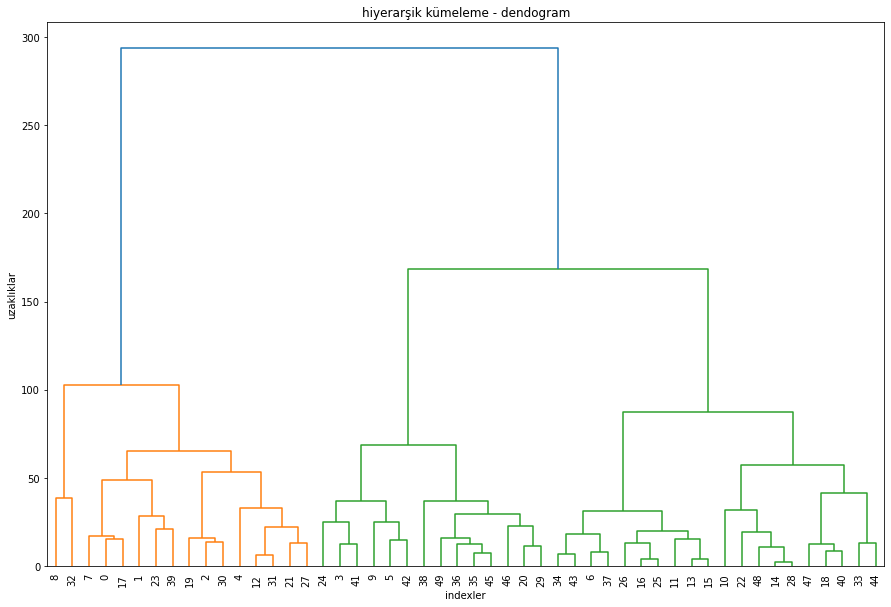

In [16]:
plt.figure(figsize=(15,10))
plt.title("hiyerarşik kümeleme - dendogram")
plt.xlabel("indexler")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,leaf_font_size=10);

hc_complete, hc_average, hc_single nesnelerini inceleyelim


In [ ]:
hc_complete

In [ ]:
hc_single

In [ ]:
hc_average

In [ ]:
dir(hc_single)

olaya biraz daha uzaktan bakmak istersek

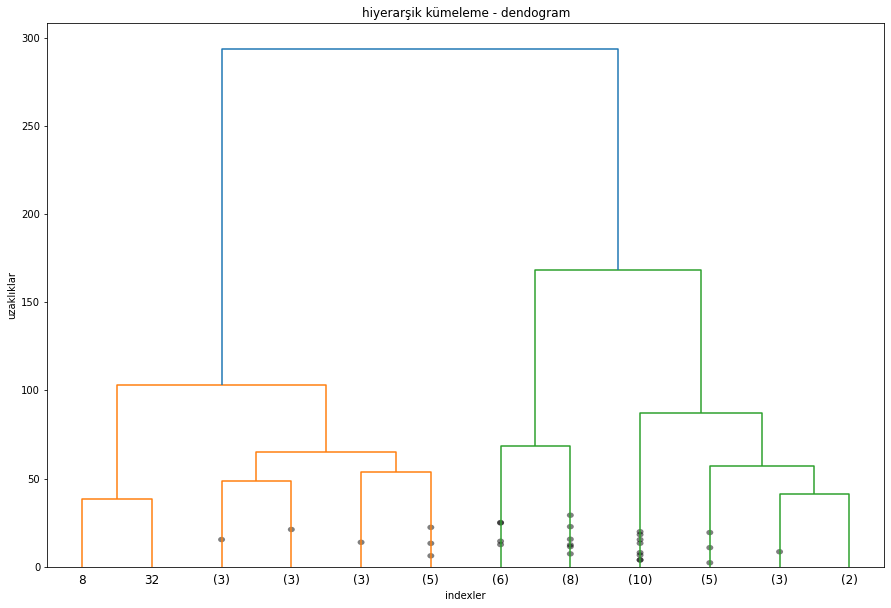

In [23]:
plt.figure(figsize=(15,10))
plt.title("hiyerarşik kümeleme - dendogram")
plt.xlabel("indexler")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=12,
           show_contracted=True
           );
           

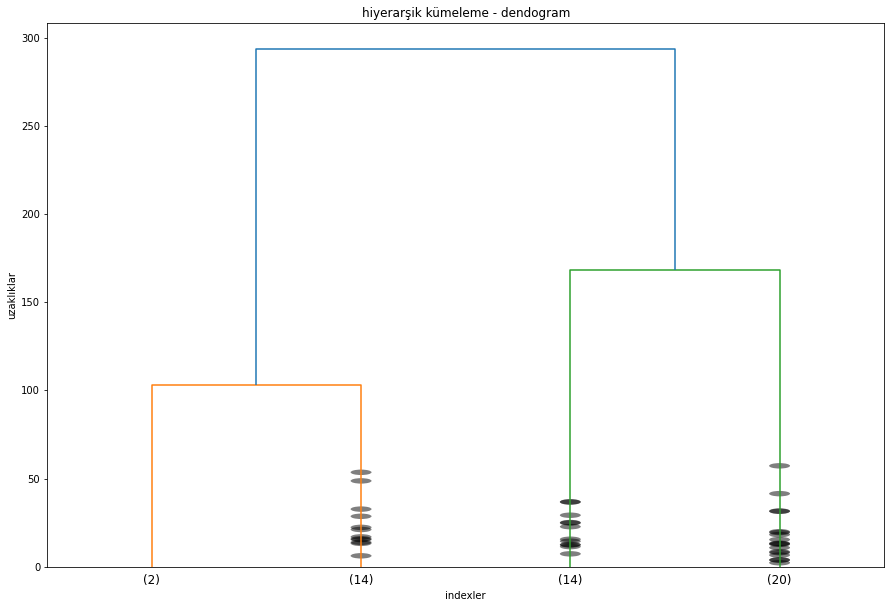

In [26]:
plt.figure(figsize=(15,10))
plt.title("hiyerarşik kümeleme - dendogram")
plt.xlabel("indexler")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=4,
           show_contracted=True
           );
           

## Uygulama 2

### optimum küme sayıs belirleme

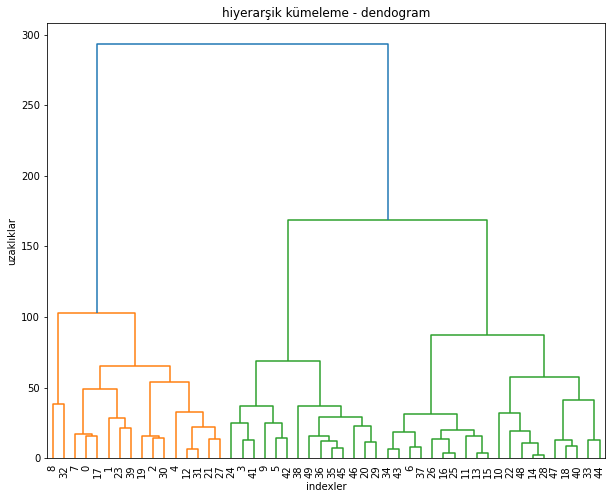

In [27]:
plt.figure(figsize=(10,8))
plt.title("hiyerarşik kümeleme - dendogram")
plt.xlabel("indexler")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,leaf_font_size=10);

In [29]:
?dendrogram

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
cluster=AgglomerativeClustering(n_clusters=4,
                                affinity="euclidean",
                                linkage="ward")
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [38]:
pd.DataFrame({"eyaletler":df.index,
              "küme_no":cluster.fit_predict(df)})[:10]

,eyaletler,küme_no
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [39]:
df["küme_no"]=cluster.fit_predict(df)

In [40]:
df.head()

,Murder,Assault,UrbanPop,Rape,küme_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# 3 farklı birleştirme yöntemi ile dendrogram oluşturma

In [41]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(df,"complete")
hc_average=linkage(df,"average")
hc_single=linkage(df,"single")

# linkage="single"   methodu ile

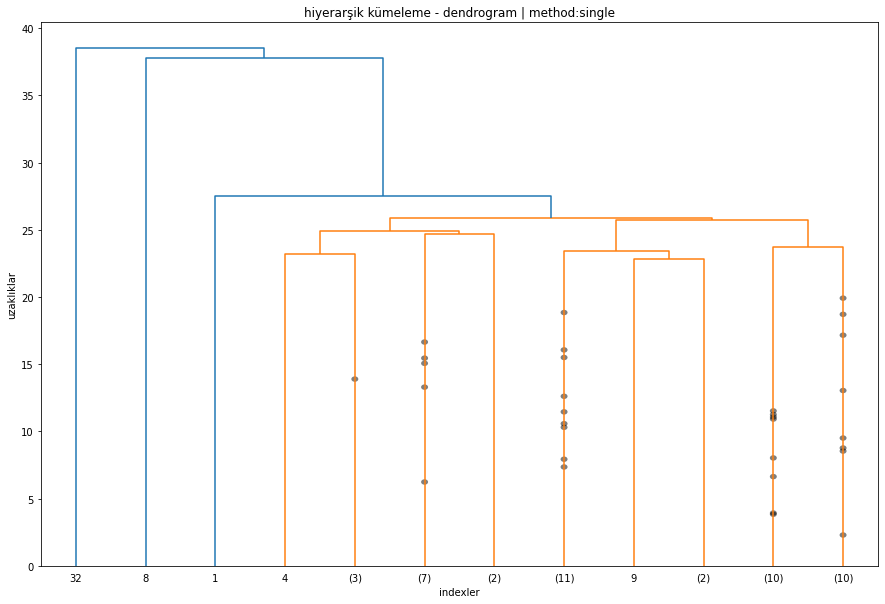

In [45]:
plt.figure(figsize=(15,10))
plt.title("hiyerarşik kümeleme - dendrogram | method:single")
plt.xlabel("indexler")
plt.ylabel("uzaklıklar")
dendrogram(hc_single,
           leaf_font_size=10,
           truncate_mode="lastp",
           p=12,
           show_contracted=True);

# linkage="average" methodu ile

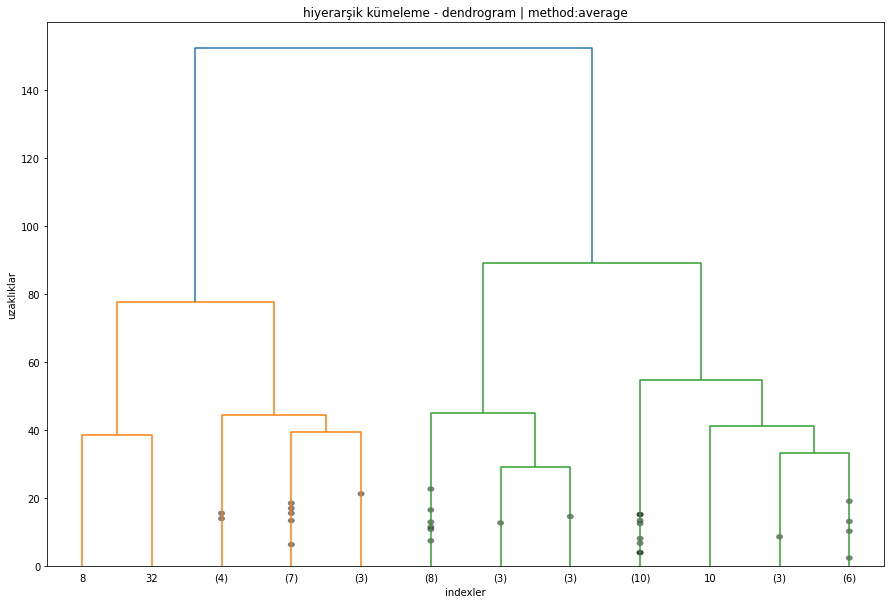

In [46]:
plt.figure(figsize=(15,10))
plt.title("hiyerarşik kümeleme - dendrogram | method:average")
plt.xlabel("indexler")
plt.ylabel("uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10,
           truncate_mode="lastp",
           p=12,
           show_contracted=True);

# linkage="complete" methodu ile

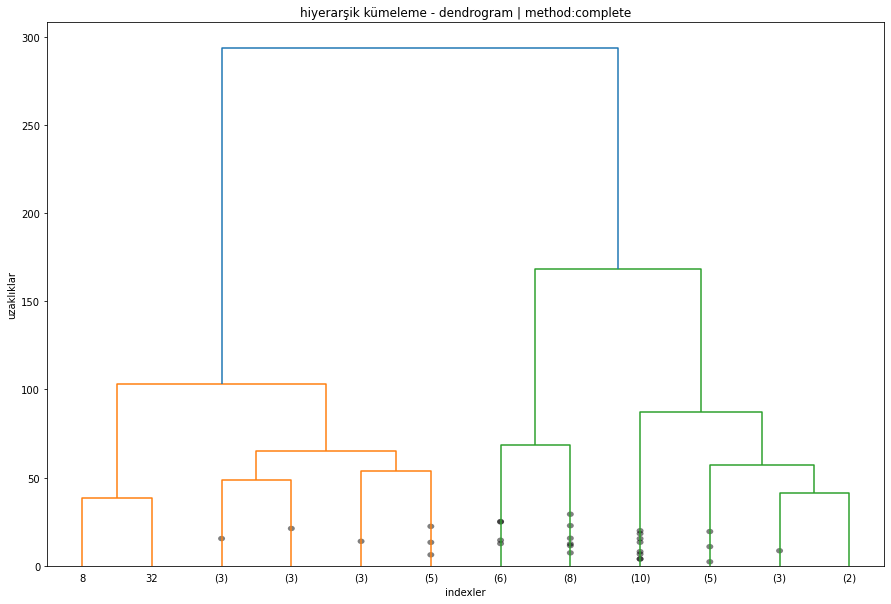

In [47]:
plt.figure(figsize=(15,10))
plt.title("hiyerarşik kümeleme - dendrogram | method:complete")
plt.xlabel("indexler")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,
           leaf_font_size=10,
           truncate_mode="lastp",
           p=12,
           show_contracted=True);